In [77]:
!pip install wordcloud

In [5]:
import pandas as pd
import numpy as np
import regex as re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.preprocessing import MultiLabelBinarizer
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rimsha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rimsha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rimsha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rimsha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rimsha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# DATA CLEANING

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def generate_metrics(y_true, y_pred):
    """
    Generate metrics for machine learning models.

    Parameters:
    - y_true: array-like, shape (n_samples,)
        Ground truth (correct) target values.
    - y_pred: array-like, shape (n_samples,)
        Estimated targets as returned by a classifier.

    Returns:
    - metrics_dict: dict
        A dictionary containing the following metrics:
        - accuracy
        - precision
        - recall
        - f1_score
        - confusion_matrix
    """
    metrics_dict = {}

    # Accuracy
    metrics_dict['accuracy'] = accuracy_score(y_true, y_pred)

    # Precision
    metrics_dict['precision'] = precision_score(y_true, y_pred, average='weighted')

    # Recall
    metrics_dict['recall'] = recall_score(y_true, y_pred, average='weighted')

    # F1 Score
    metrics_dict['f1_score'] = f1_score(y_true, y_pred, average='weighted')

    return metrics_dict

In [7]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(sentence)
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_sentence)

In [8]:
lemmatizer = WordNetLemmatizer()
def perform_lemmatization(sentence):
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [9]:
pd_netflix = pd.read_csv('netflix_data.csv')

In [10]:
pd_netflix.shape

(7787, 12)

In [11]:
missing_values = pd_netflix.isnull().sum()


In [12]:
netflix_cast_direct = pd_netflix[['cast', 'director']]

In [13]:
pd_netflix = pd_netflix.drop(['title','show_id','duration','director','cast'],axis=1)

In [14]:
pd_netflix.shape

(7787, 7)

In [15]:
pd_netflix['description']=pd_netflix['description'].str.lower()
pd_netflix['description']=pd_netflix['description'].str.replace('(@\w+.*?)',"", regex=True)
pd_netflix['description'] =pd_netflix['description'].str.replace("#[A-Za-z0-9_]+","", regex=True)
#Removing special characters from tweets
pd_netflix['description']=pd_netflix['description'].str.replace('[@,#,%,:,?,-,$,_,.,!,/,),(,=,;,*]',"",regex=True) 
pd_netflix['description']=pd_netflix['description'].str.replace(r'-',"", regex=True) 
pd_netflix['description']=pd_netflix['description'].str.replace('\[' ,"", regex=True) 
pd_netflix['description']=pd_netflix['description'].str.replace(']' ,"", regex=True) 


pd_netflix['description']=pd_netflix['description'].str.replace('\n'," ",regex=True)
pd_netflix['description'] = pd_netflix['description'].str.replace('[()!?]'," ", regex=True) 
pd_netflix['description'] = pd_netflix['description'].str.replace('\[.*?\]'," ", regex=True)
pd_netflix['description'] = pd_netflix['description'].str.replace('\'s',"", regex=True)
pd_netflix['description'] = pd_netflix['description'].str.replace('\""',"", regex=True)
pd_netflix['description'] = pd_netflix['description'].replace(to_replace='\d', value='', regex=True)
pd_netflix['description'] = pd_netflix['description'].replace(to_replace='[^a-zA-Z0-9 ]', value='', regex=True)

In [16]:
pd_netflix['description'] = pd_netflix['description'].apply(remove_stopwords)
pd_netflix['description'] = pd_netflix['description'].apply(perform_lemmatization)

In [17]:
columns_to_check = pd_netflix.columns
pd_netflix = pd_netflix.dropna(subset=columns_to_check)

In [18]:
pd_netflix['date_added'] = pd.to_datetime(pd_netflix['date_added'])
pd_netflix['year'] = (pd_netflix['date_added'].dt.year).astype(int)

In [19]:
pd_netflix = pd_netflix.drop(['date_added','release_year'],axis=1)

In [20]:
netflix_raw = pd_netflix.copy()

# REDUCE NUMBER OF GENRE CLASSES

In [21]:
gen_temp = pd_netflix['listed_in'].str.split(',')

In [22]:
gen_temp = [[item.lstrip() for item in sublist] for sublist in gen_temp]

In [23]:
from itertools import chain
from collections import Counter
genre_counts = dict(Counter(chain.from_iterable(gen_temp)))
sorted_dict_desc = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)[:25])

In [24]:
best_classes = list(sorted_dict_desc.keys())

In [25]:
best_classes = [s.lstrip() for s in best_classes]

In [26]:
pd_netflix['cleaned_genre'] = [[item for item in sublist if item in best_classes] for sublist in gen_temp]

In [27]:
pd_netflix['cleaned_genre'] = pd_netflix['cleaned_genre'].astype(str)

In [28]:
pd_netflix['cleaned_genre'] = pd_netflix['cleaned_genre'].str.replace(r'\[|\]', '')

/var/folders/ll/r70m5pss4q33vcz2wq6prh8m0000gn/T/ipykernel_64129/821086498.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pd_netflix['cleaned_genre'] = pd_netflix['cleaned_genre'].str.replace(r'\[|\]', '')


In [29]:
pd_netflix['cleaned_genre'] = pd_netflix['cleaned_genre'].str.replace("'", '')

In [30]:
pd_netflix = pd_netflix[pd_netflix['cleaned_genre'].str.len()>0]

In [31]:
pd_netflix = pd_netflix.drop(['listed_in'],axis=1)

In [32]:
netflix_genre = pd_netflix['cleaned_genre'].str.split(',',expand=True)[0]

netflix_genre = [item.lstrip() for item in netflix_genre]

netflix_genre_multi=pd_netflix['cleaned_genre'].str.split(',')

netflix_genre_multi = [[item.lstrip() for item in sublist] for sublist in netflix_genre_multi]

# CONFIGURE X VARIABLES FOR TRAINING

In [33]:
pd_netflix = pd_netflix.drop(['cleaned_genre'],axis=1)

In [34]:
netflix_descs = pd_netflix['description']

In [35]:
pd_netflix = pd_netflix.drop('description',axis=1)

In [36]:
pd_netflix = pd.get_dummies(pd_netflix, columns=['rating'])

In [37]:
pd_netflix = pd.get_dummies(pd_netflix, columns=['type'])

In [38]:
main_country = list(pd_netflix['country'].str.split(',',expand=True).iloc[:,0])

In [39]:
pd_netflix['main_country'] = pd_netflix['country'].str.split(',',expand=True)[0]

In [40]:
pd_netflix = pd_netflix.drop(['country'],axis=1)

In [41]:
pd_netflix_country=pd_netflix['main_country']

In [42]:
pd_netflix = pd.get_dummies(pd_netflix, columns=['main_country'])

In [43]:
pd_netflix = pd.get_dummies(pd_netflix, columns=['year'])

In [44]:
list(pd_netflix.columns)

['rating_G',
 'rating_NC-17',
 'rating_NR',
 'rating_PG',
 'rating_PG-13',
 'rating_R',
 'rating_TV-14',
 'rating_TV-G',
 'rating_TV-MA',
 'rating_TV-PG',
 'rating_TV-Y',
 'rating_TV-Y7',
 'rating_TV-Y7-FV',
 'rating_UR',
 'type_Movie',
 'type_TV Show',
 'main_country_Argentina',
 'main_country_Australia',
 'main_country_Austria',
 'main_country_Bangladesh',
 'main_country_Belarus',
 'main_country_Belgium',
 'main_country_Brazil',
 'main_country_Bulgaria',
 'main_country_Cambodia',
 'main_country_Canada',
 'main_country_Chile',
 'main_country_China',
 'main_country_Colombia',
 'main_country_Croatia',
 'main_country_Cyprus',
 'main_country_Czech Republic',
 'main_country_Denmark',
 'main_country_Egypt',
 'main_country_Finland',
 'main_country_France',
 'main_country_Georgia',
 'main_country_Germany',
 'main_country_Ghana',
 'main_country_Greece',
 'main_country_Guatemala',
 'main_country_Hong Kong',
 'main_country_Hungary',
 'main_country_Iceland',
 'main_country_India',
 'main_country_

# BEFORE CLEANING

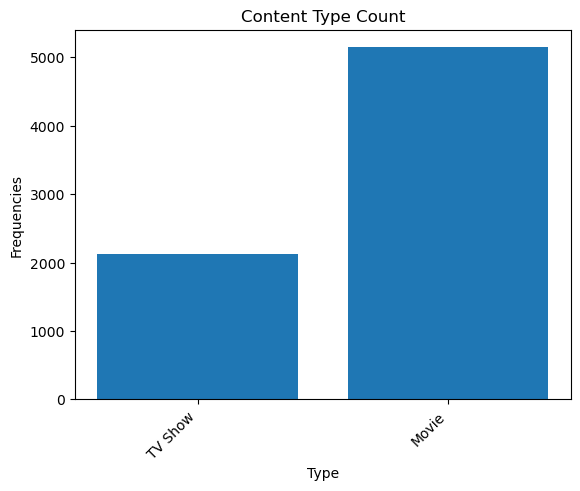

In [45]:
from collections import Counter

frequency_counter_1 = Counter(netflix_raw['type'])

top_elements_1 = frequency_counter_1.keys()
top_frequencies_1 = frequency_counter_1.values()

# Plot the top 25 frequencies
plt.bar(top_elements_1, top_frequencies_1)
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.title('Content Type Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [46]:
netflix_raw.head(1)

,type,country,rating,listed_in,description,year
0,TV Show,Brazil,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy",future elite inhabit island paradise far crowded slum get one chance join saved squalor,2020


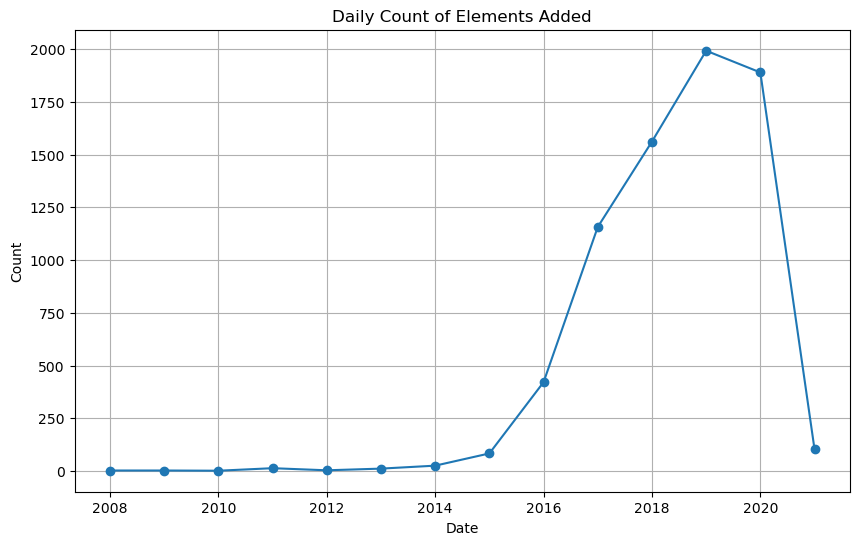

In [47]:
daily_counts = netflix_raw.groupby('year').count()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(daily_counts.index, daily_counts['rating'], marker='o', linestyle='-')
plt.title('Daily Count of Elements Added')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

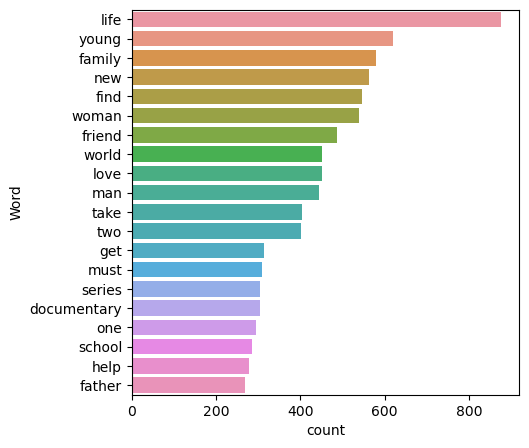

In [48]:
def freq_words(x, terms): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(5,5)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(netflix_descs, 20)

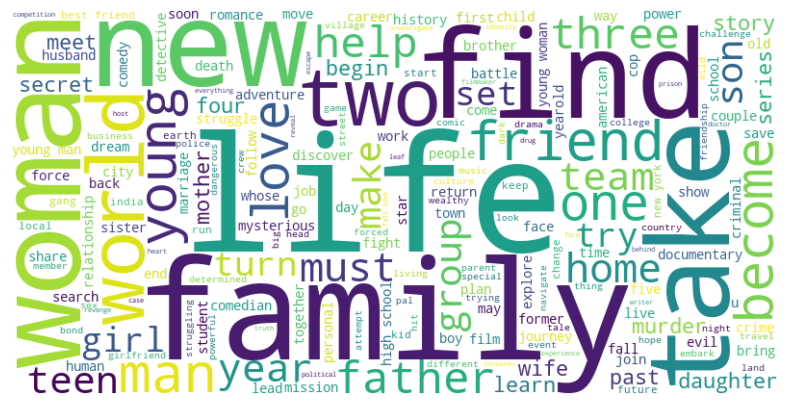

In [49]:
text = ' '.join(netflix_descs)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image                        
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

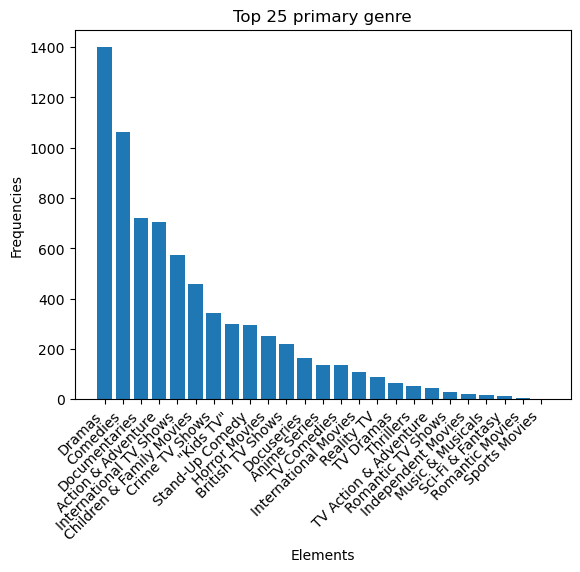

In [50]:
from collections import Counter

frequency_counter = Counter(netflix_genre)

top_elements = [item[0] for item in frequency_counter.most_common(30)]
top_frequencies = [item[1] for item in frequency_counter.most_common(30)]

# Plot the top 25 frequencies
plt.bar(top_elements, top_frequencies)
plt.xlabel('Elements')
plt.ylabel('Frequencies')
plt.title('Top 25 primary genre')
plt.xticks(rotation=45, ha='right')
plt.show()

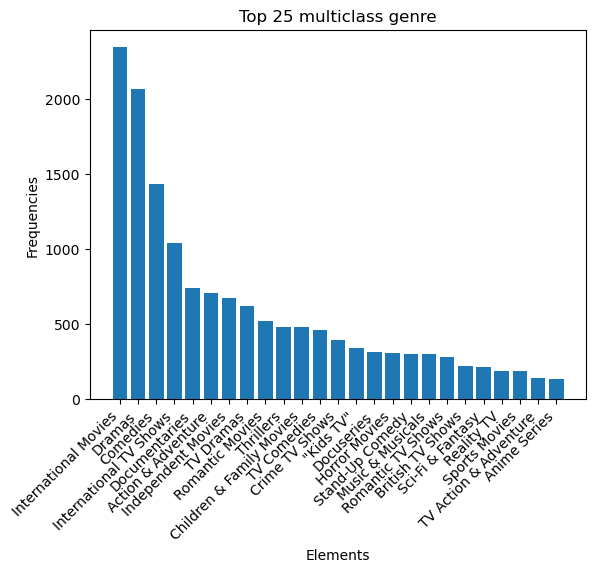

In [51]:
# Flatten the nested list
flat_list = [item for sublist in netflix_genre_multi for item in sublist]

# Calculate frequencies
frequency_counter = Counter(flat_list)

# Extract top 25 elements and frequencies
top_elements = [item[0] for item in frequency_counter.most_common(25)]
top_frequencies = [item[1] for item in frequency_counter.most_common(25)]

# Plot the top 25 frequencies with rotated x labels
plt.bar(top_elements, top_frequencies)
plt.xlabel('Elements')
plt.ylabel('Frequencies')
plt.title('Top 25 multiclass genre')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle as needed

plt.show()

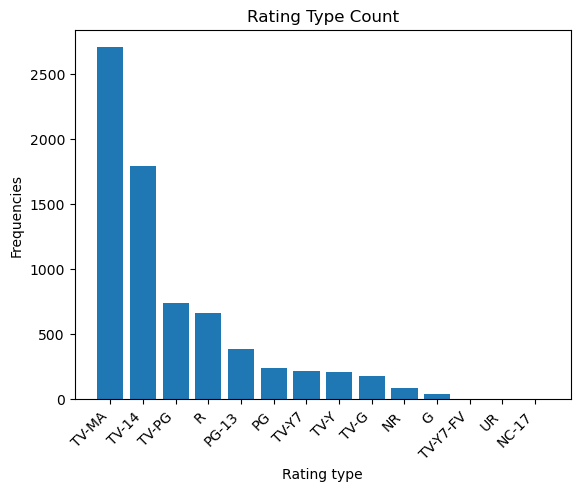

In [52]:
from collections import Counter

frequency_counter_2 = Counter(netflix_raw['rating'])

top_elements_2 = [item[0] for item in frequency_counter_2.most_common(30)]
top_frequencies_2 = [item[1] for item in frequency_counter_2.most_common(30)]

# Plot the top 25 frequencies
plt.bar(top_elements_2, top_frequencies_2)
plt.xlabel('Rating type')
plt.ylabel('Frequencies')
plt.title('Rating Type Count')
plt.xticks(rotation=45, ha='right')
plt.show()

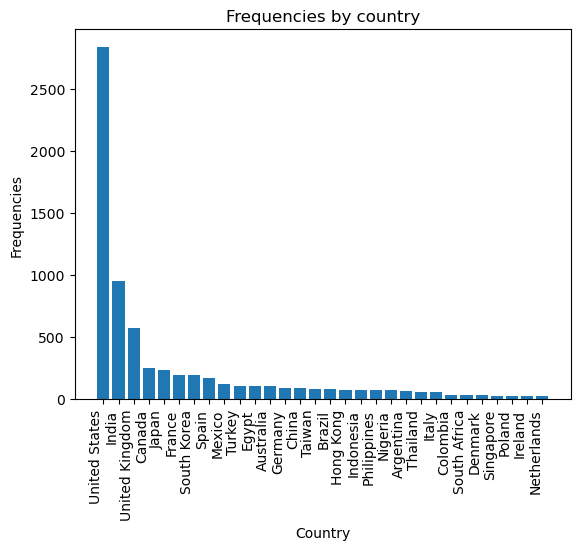

In [53]:
from collections import Counter

frequency_counter_3 = Counter(pd_netflix_country)

top_elements_3 = [item[0] for item in frequency_counter_3.most_common(30)]
top_frequencies_3 = [item[1] for item in frequency_counter_3.most_common(30)]

# Plot the top 25 frequencies
plt.bar(top_elements_3, top_frequencies_3)
plt.xlabel('Country')
plt.ylabel('Frequencies')
plt.title('Frequencies by country')
plt.xticks(rotation=90, ha='right')
plt.show()

# GENERATE Y FOR PREDICTION

In [55]:
y_multi

NameError: name 'y_multi' is not defined

In [56]:
multilabel_binarizer.inverse_transform(y_multi)

NameError: name 'multilabel_binarizer' is not defined

In [57]:
# GENERATE Y (multi class)

from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(netflix_genre_multi)

# transform target variable
y_multi = multilabel_binarizer.transform(netflix_genre_multi)

In [58]:
from sklearn import preprocessing 
   
label_encoder = preprocessing.LabelEncoder() 

y_uni = label_encoder.fit_transform(netflix_genre)

# UNI CLASS PREDICTIONS USING TEXT

In [59]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=100000)

xtrain, xval, ytrain, yval = train_test_split(netflix_descs, y_uni, test_size=0.2, random_state=9)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)

y_pred_uni_text_lr = clf.predict(xval_tfidf)

In [60]:
generate_metrics(yval,y_pred_uni_text_lr)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.4115197779319917,
 'precision': 0.42087505428461247,
 'recall': 0.4115197779319917,
 'f1_score': 0.3562904854854181}

In [61]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain_tfidf, ytrain)
y_pred_uni_text_dt = model.predict(xval_tfidf)

In [62]:
generate_metrics(yval,y_pred_uni_text_dt)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.29354614850798055,
 'precision': 0.28336152321888647,
 'recall': 0.29354614850798055,
 'f1_score': 0.28206201489673355}

# MULTI CLASS PREDICTIONS USING TEXT

In [63]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)

xtrain, xval, ytrain, yval = train_test_split(netflix_descs, y_multi, test_size=0.2, random_state=9)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain_tfidf, ytrain)

y_pred_multi_text_lr = clf.predict(xval_tfidf)
generate_metrics(yval, y_pred_multi_text_lr)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.061068702290076333,
 'precision': 0.5292122758007168,
 'recall': 0.14164689935615046,
 'f1_score': 0.2011798887136522}

In [64]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain_tfidf, ytrain)
y_pred_multi_text_dt = model.predict(xval_tfidf)

generate_metrics(yval, y_pred_multi_text_dt)

{'accuracy': 0.10687022900763359,
 'precision': 0.2855280959696669,
 'recall': 0.29041003049813624,
 'f1_score': 0.28644080147992196}

# PREDICT USING ATTRIBUTES UNI CLASS

In [65]:
xtrain, xval, ytrain, yval = train_test_split(pd_netflix, y_uni, test_size=0.2, random_state=9)


lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain, ytrain)

y_pred_uni_att_lr = clf.predict(xval)
generate_metrics(yval,y_pred_uni_att_lr )

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.49340735600277585,
 'precision': 0.4555414011765882,
 'recall': 0.49340735600277585,
 'f1_score': 0.45544582946312956}

In [66]:



model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
y_pred_uni_att_d = model.predict(xval)

generate_metrics(yval,y_pred_uni_att_d)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.47050659264399725,
 'precision': 0.4472989797568274,
 'recall': 0.47050659264399725,
 'f1_score': 0.4514130933466786}

# PREDICT USING ATTRIBUTES MULTI CLASS

In [67]:
xtrain, xval, ytrain, yval = train_test_split(pd_netflix, y_multi, test_size=0.2, random_state=9)



lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
clf.fit(xtrain, ytrain)

y_pred_multi_att_lr = clf.predict(xval)

generate_metrics(yval,y_pred_multi_att_lr)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

{'accuracy': 0.16585704371963914,
 'precision': 0.6149344309267453,
 'recall': 0.3988478481870552,
 'f1_score': 0.43974451558462935}

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
y_pred_multi_att_dt = model.predict(xval)

generate_metrics(yval,y_pred_multi_att_dt)

{'accuracy': 0.16516308119361556,
 'precision': 0.5808357536390271,
 'recall': 0.4185022026431718,
 'f1_score': 0.4583801374625508}

# UNI CLASS NUERAL NETWORK WITH ATTRIBUTES

In [69]:
xtrain, xval, ytrain, yval = train_test_split(pd_netflix, y_uni, test_size=0.2, random_state=9)

In [70]:


# Step 2: Build and train the neural network model
mlp_regressor = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_regressor.fit(xtrain, ytrain)

# Step 3: Evaluate the model
y_pred_uni_att_nn = mlp_regressor.predict(xval)

generate_metrics(yval,y_pred_uni_att_nn)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.4899375433726579,
 'precision': 0.4532123566850091,
 'recall': 0.4899375433726579,
 'f1_score': 0.45796031173875684}

# multiclass CLASS NUERAL NETWORK WITH ATTRIBUTES

In [71]:
xtrain, xval, ytrain, yval = train_test_split(pd_netflix, y_multi, test_size=0.2, random_state=9)



# Step 2: Build and train the neural network model
mlp_regressor = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_regressor.fit(xtrain, ytrain)

# Step 3: Evaluate the model
y_pred_multi_att_nn = mlp_regressor.predict(xval)

generate_metrics(yval,y_pred_multi_att_nn)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.1311589174184594,
 'precision': 0.5300334906812034,
 'recall': 0.3764825482887157,
 'f1_score': 0.39973505574615315}

# NUERAL NETWORK UNI TEXT

In [72]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000)

xtrain, xval, ytrain, yval = train_test_split(netflix_descs, y_uni, test_size=0.2, random_state=9)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [73]:



# Step 2: Build and train the neural network model
mlp_regressor = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_regressor.fit(xtrain_tfidf, ytrain)

# Step 3: Evaluate the model
y_pred_uni_text_nn = mlp_regressor.predict(xval_tfidf)


generate_metrics(yval,y_pred_uni_text_nn)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.20680083275503122,
 'precision': 0.14835705799577248,
 'recall': 0.20680083275503122,
 'f1_score': 0.1625835209365741}

# NUERAL NETWORK MULTI TEXT

In [74]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=100)

xtrain, xval, ytrain, yval = train_test_split(netflix_descs, y_multi, test_size=0.2, random_state=9)

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# Step 2: Build and train the neural network model
mlp_regressor = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_regressor.fit(xtrain_tfidf, ytrain)

# Step 3: Evaluate the model
y_pred_multi_text_nn = mlp_regressor.predict(xval_tfidf)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
generate_metrics(yval,y_pred_multi_text_nn)

/Users/rimsha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.061068702290076333,
 'precision': 0.37640191589061384,
 'recall': 0.11860386309725517,
 'f1_score': 0.16297972214640236}

# CLUSTERING

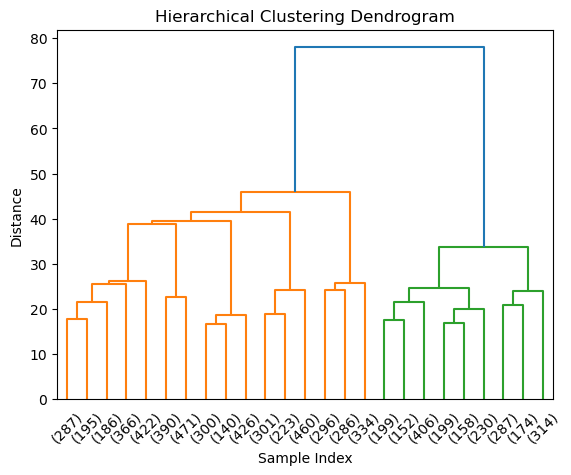

In [76]:

# Perform hierarchical clustering
linked = linkage(pd_netflix, 'ward')

# Create a dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, truncate_mode='lastp', p=25)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()
